In [54]:
# Preamble  here, add paths and import relevant modules
import os, sys
sys.path.append('/'.join(os.getcwd().split('/')[:-1]))
import util
base_path = '/'.join(os.getcwd().split('/')[:-1])
import numpy as np 
import sklearn
from scipy import misc
from sklearn import datasets
from scipy.sparse.linalg import eigsh
from numpy.random import permutation
% matplotlib inline
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('/'.join(os.getcwd().split('/')[:-1]))
import numpy as np 
from sklearn import datasets
% matplotlib inline
import matplotlib.pyplot as plt

## 1. Eigenvectors of Graph Laplacian contain geometric information of the underlying manifold

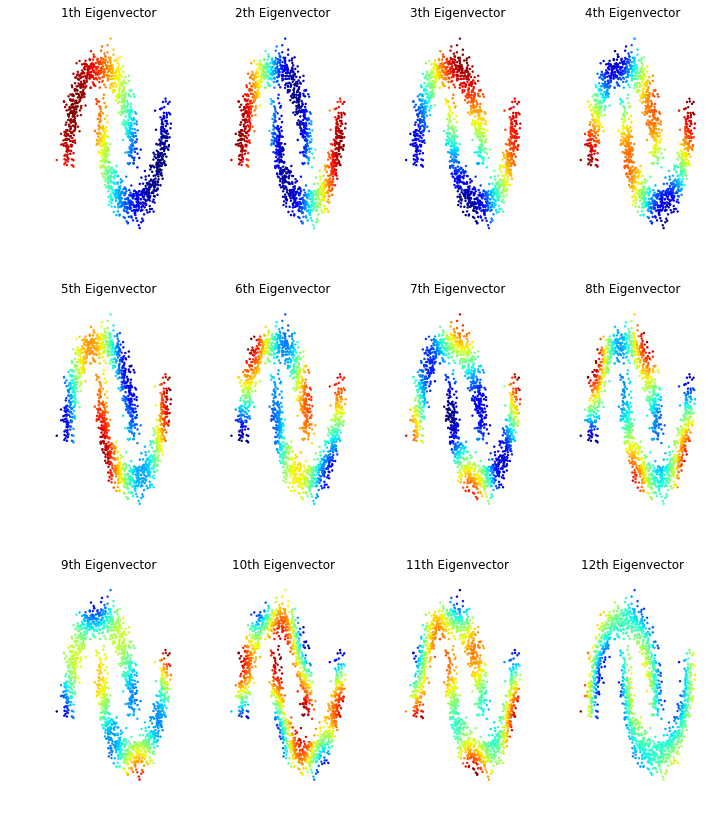

In [26]:
test_graph = util.BuildGraph(affinity = 'rbf', gamma = 1.5,Eig_solver = 'arpack', Neig = 20,num_nystrom = 30)
data, y = sklearn.datasets.make_moons(n_samples=1500, noise=0.1,shuffle = False)
test_graph.build_Laplacian(data)  
v = test_graph.laplacian_matrix_['V']
plt.rcParams['figure.figsize'] = (12, 14)
for i in range(3):
    for j in range(4):
        plt.subplot(3,4,i*4+j+1)
        plt.scatter(data[:,0], data[:,1],s = 6, c = v[:,i*4+j+1], edgecolors='none')
        plt.axis('off')
        plt.title('{ind}th Eigenvector'.format( ind = i*4+j+1))
plt.show()

## 2. The spectral embedding is a non-linear transformation on the data domain

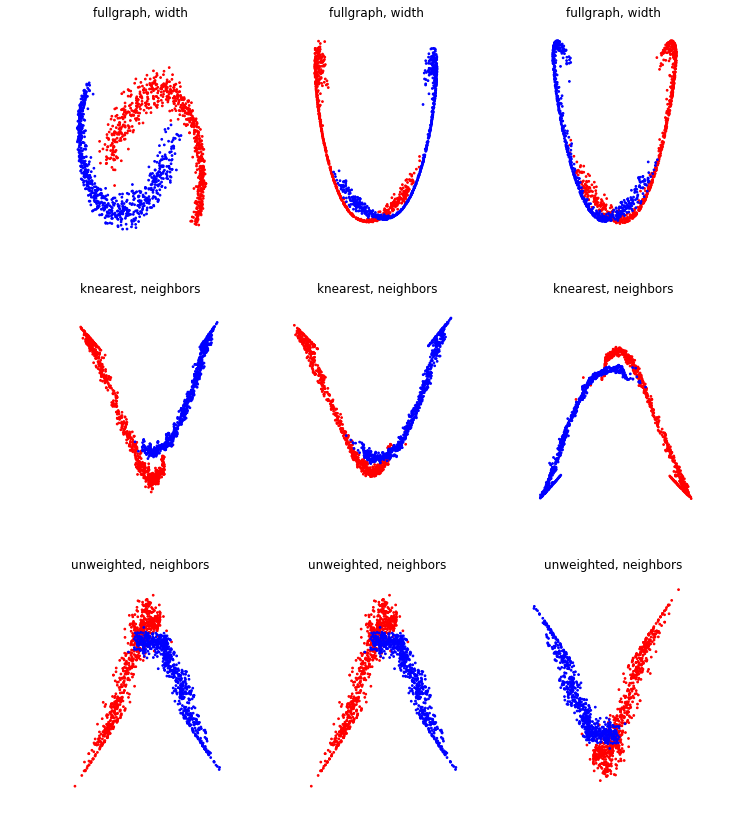

In [50]:
graph = {}
temp = [.4,.7,2]
for i in range(3):
    graph[0,i] = util.BuildGraph(Eig_solver = 'arpack', affinity = 'rbf', Neig = 4,gamma =temp[i])
temp = [10,20,30]    
for i in range(3):
    graph[1,i] = util.BuildGraph(Eig_solver = 'arpack', affinity = 'rbf', neighbor_type = 'knearest', 
                        n_neighbors = temp[i], Neig = 4,gamma =0.5 )
for i in range(3):
    graph[2,i] = util.BuildGraph(Eig_solver = 'arpack', affinity = '0-1', neighbor_type = 'knearest', 
                        n_neighbors = 15+5*(j), Neig = 4)
s = {}
s[0] = 'fullgraph, width'
s[1] = 'knearest, neighbors'
s[2] = 'unweighted, neighbors'
for i in range(3):
    for j in range(3):
        graph_cur = graph[i,j]
        graph_cur.build_Laplacian(data)
        V = graph_cur.laplacian_matrix_['V']
        x_t = V[:,1]
        y_t = V[:,2]
        color = 'r'*750 + 'b'*750
        plt.subplot(3,3,i*3+j+1)
        plt.scatter(x_t,y_t,s = 3, color = color)
        plt.axis('off')
        plt.title(s[i])
plt.show()

## 3. Nystrom Extension can generate approximate eigenvectors for non-local image graphs

Here are the two cows example:

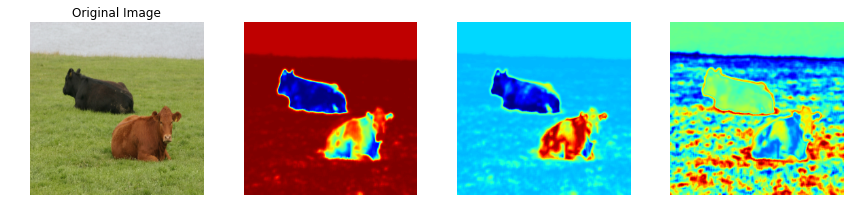

In [61]:
# load the two cows image
img = np.float32(misc.imresize(misc.imread(base_path+'/data/Images/twocows.png'),(256,256)))/255.
#initialization
import graph_cluster as gc
clf = gc.LaplacianClustering()
clf.load_data(raw_data = util.imageblocks(img, width = 2)) #patch size = 2*width + 1
plt.subplot(1,4,1)
plt.imshow(img)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.title('Original Image')
clf.build_graph(Neig = 100,Eig_solver = 'nystrom',gamma = 1, num_nystrom = 100)
v = clf.graph.laplacian_matrix_['V']
e = clf.graph.laplacian_matrix_['E']
for i in range(2,5):
    plt.subplot(1,4,i)
    plt.imshow(v[:,i].reshape(img.shape[0],img.shape[1]))
    plt.axis('off')
plt.tight_layout()  
plt.show()  

Same algorithm tried on Lena

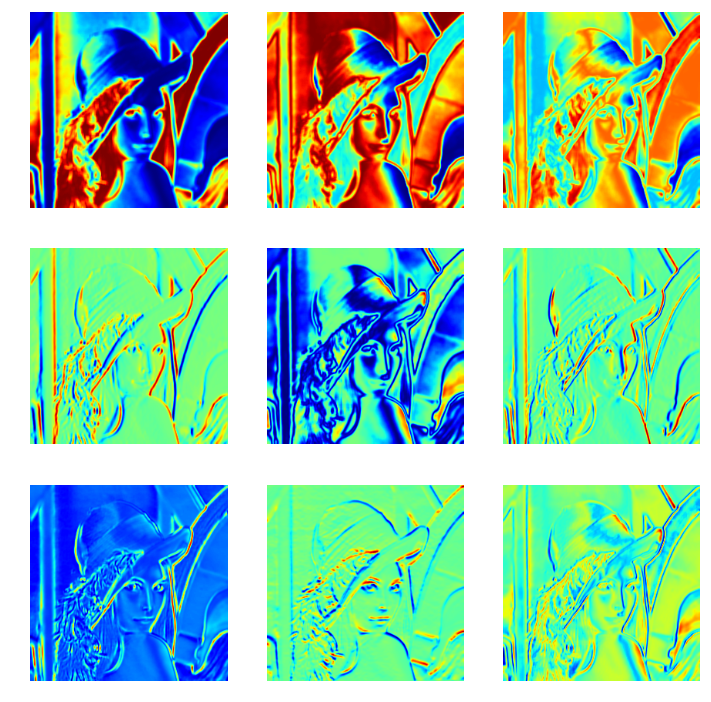

In [63]:
# load the lena image
img = np.float32(misc.imresize(misc.imread(base_path+'/data/Images/lena.png'),(256,256)))/255.
clf.load_data(util.imageblocks(img, width = 2)) #patch size = 2*width + 1
clf.build_graph(Neig = 100,Eig_solver = 'nystrom',gamma = 1, num_nystrom = 100)
v = clf.graph.laplacian_matrix_['V']
e1 = clf.graph.laplacian_matrix_['E']
plt.figure(2)
for i in range(3):
    for j in range(3):
        plt.subplot(3,3,i*3+j+1)
        plt.imshow(v[:,i*3+j+1].reshape(img.shape[0],img.shape[1]))
        plt.axis('off')
plt.rcParams['figure.figsize'] = (7, 7)
plt.tight_layout()  
plt.show()   